<a href="https://colab.research.google.com/github/grvtaun/Machine-Learning/blob/main/PG23373.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
# Load the data
data = pd.read_excel('advertising.xlsx')

In [8]:
## Step 1: Data Preprocessing
print("=== Data Preprocessing ===")


=== Data Preprocessing ===


In [9]:
# Drop non-numeric and non-predictive columns
data = data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1)

In [10]:
# Convert 'Male' to integer (it's currently float with 0.0 and 1.0)
data['Male'] = data['Male'].astype(int)

In [11]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Clicked on Ad               0
dtype: int64


In [12]:
# Basic statistics
print("\nData statistics:")
print(data.describe())



Data statistics:
       Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              

In [13]:
## Step 2: Correlation Analysis
print("\n=== Correlation Analysis ===")


=== Correlation Analysis ===


In [14]:
# Calculate correlation matrix
corr_matrix = data.corr()


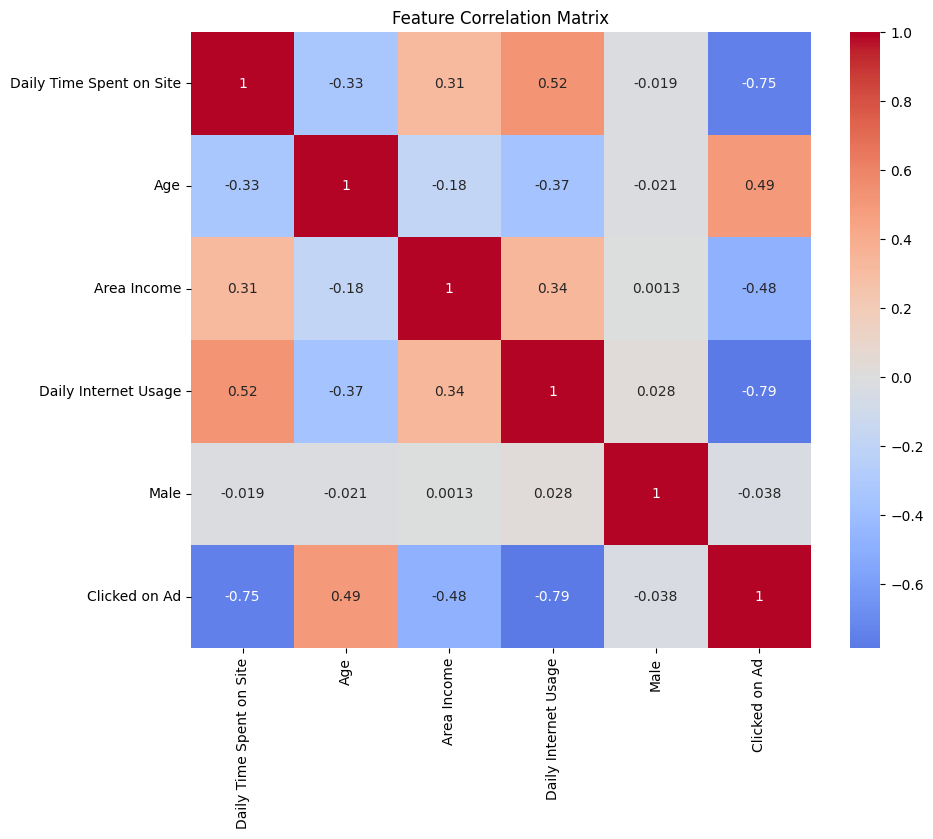

In [15]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

In [16]:
# Correlation with target variable
print("\nCorrelation with target variable (Clicked on Ad):")
print(corr_matrix['Clicked on Ad'].sort_values(ascending=False))


Correlation with target variable (Clicked on Ad):
Clicked on Ad               1.000000
Age                         0.492531
Male                       -0.038027
Area Income                -0.476255
Daily Time Spent on Site   -0.748117
Daily Internet Usage       -0.786539
Name: Clicked on Ad, dtype: float64


In [17]:
## Step 3: Prepare Data for Modeling
# Separate features and target
X = data.drop('Clicked on Ad', axis=1)
y = data['Clicked on Ad']

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
## Step 4: Implement Logistic Regression Model
print("\n=== Logistic Regression Model ===")


=== Logistic Regression Model ===


In [21]:
# Initialize and train the model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [22]:
# Predictions
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)

In [23]:
## Step 5: Evaluate the Model
print("\n=== Model Evaluation ===")


=== Model Evaluation ===


In [24]:
# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [25]:
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9743
Testing Accuracy: 0.9700


In [26]:
# Classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       146
           1       0.98      0.96      0.97       154

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [27]:
# Confusion matrix
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

Confusion Matrix (Test Set):
[[143   3]
 [  6 148]]


In [28]:
# Plot feature importance
coefficients = pd.DataFrame({'Feature': X.columns, 'Importance': logreg.coef_[0]})
coefficients = coefficients.sort_values(by='Importance', ascending=False)

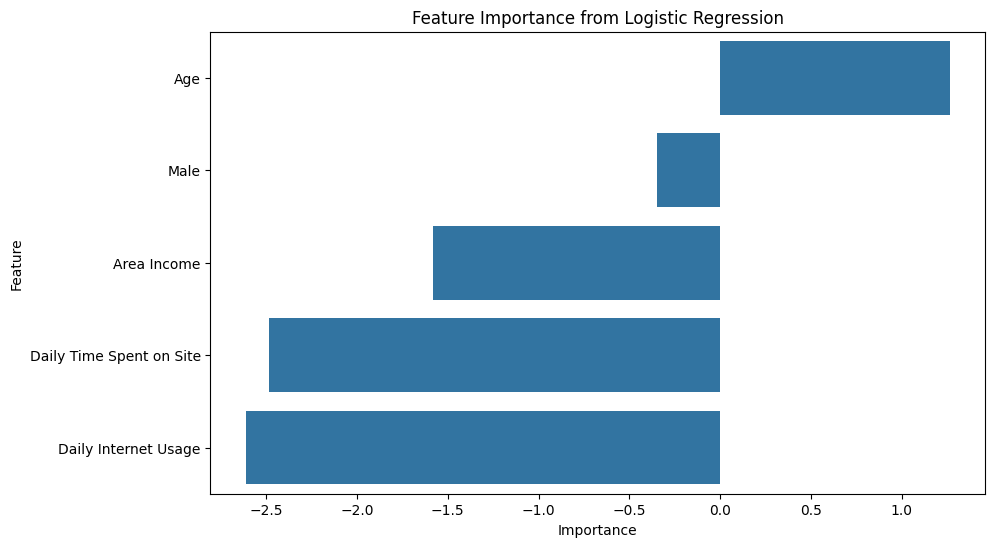

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=coefficients)
plt.title('Feature Importance from Logistic Regression')
plt.show()